In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('houses.csv')
df = df.iloc[:1000,1:-6]
print(df)
df.columns

         price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     313000.0       3.0       1.50         1340      7912     1.5   
1    2384000.0       5.0       2.50         3650      9050     2.0   
2     342000.0       3.0       2.00         1930     11947     1.0   
3     420000.0       3.0       2.25         2000      8030     1.0   
4     550000.0       4.0       2.50         1940     10500     1.0   
..         ...       ...        ...          ...       ...     ...   
995  1800000.0       4.0       3.50         4460     16953     1.0   
996   299950.0       3.0       1.00          910      8000     1.0   
997   749950.0       3.0       2.50         2770     10773     2.0   
998  1100000.0       3.0       2.00         2390      6888     2.0   
999   555000.0       3.0       2.50         3050    158558     1.0   

     waterfront  view  condition  sqft_above  sqft_basement  
0             0     0          3        1340              0  
1             0     4          5   

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement'],
      dtype='object')

In [3]:
df.dtypes

price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
dtype: object

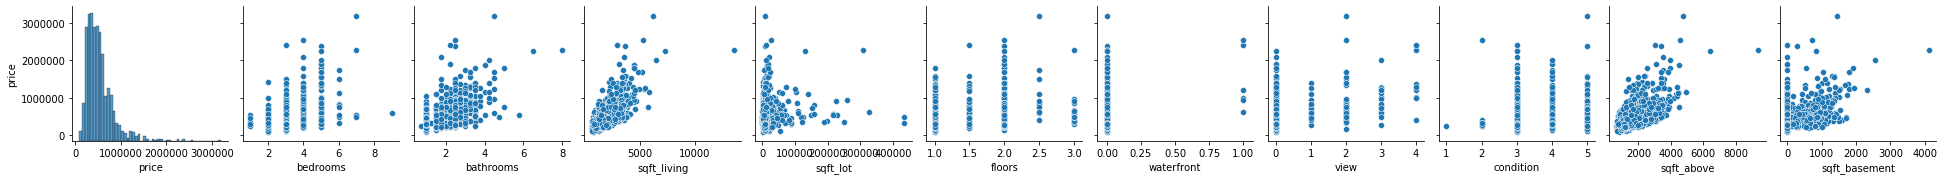

In [4]:
#removing columns with category datatype
#df=df.select_dtypes(exclude=['object'])
sns.pairplot(df,x_vars=df.columns,y_vars=['price'])

In [5]:
df['total_sqft']=df['sqft_living']+df['sqft_above']+df['sqft_lot']+df['sqft_basement']
#,'total_sqft','bedrooms',
columns = ['price','sqft_above','sqft_living']
for c in df.columns:
    if c not in columns:
        df.drop(c,axis=1,inplace=True)
df

,price,sqft_living,sqft_above
0,313000.0,1340,1340
1,2384000.0,3650,3370
2,342000.0,1930,1930
3,420000.0,2000,1000
4,550000.0,1940,1140
...,...,...,...
995,1800000.0,4460,2550
996,299950.0,910,740
997,749950.0,2770,2770
998,1100000.0,2390,2390


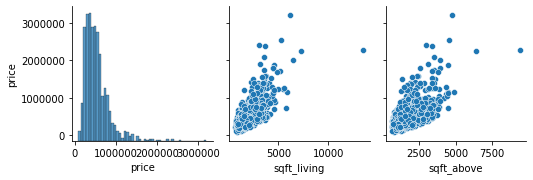

In [6]:
sns.pairplot(df,x_vars=df.columns,y_vars=['price'])

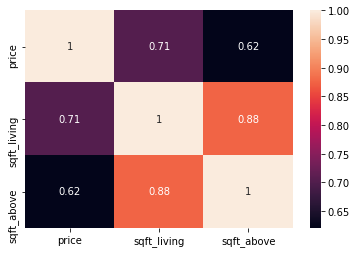

In [7]:
sns.heatmap(df.corr(),annot=True)

In [8]:
idx = 8*df.shape[0]//10
df = np.array(df)
#np.random.shuffle(df)
x_train = df[:idx,1:]
y_train = df[:idx,0]
x_test = df[idx:,1:]
y_test = df[idx:,0]

In [9]:
print(df)

[[3.1300e+05 1.3400e+03 1.3400e+03]
 [2.3840e+06 3.6500e+03 3.3700e+03]
 [3.4200e+05 1.9300e+03 1.9300e+03]
 ...
 [7.4995e+05 2.7700e+03 2.7700e+03]
 [1.1000e+06 2.3900e+03 2.3900e+03]
 [5.5500e+05 3.0500e+03 3.0500e+03]]


In [10]:
for c in range(x_train.shape[1]):
    mean = np.mean(x_train[:,c])
    std = np.std(x_train[:,c])
    x_train[:,c] = (x_train[:,c]-mean)/std
    x_test[:,c]= (x_test[:,c]-mean)/std
    
mean = np.mean(y_train)
std = np.std(y_train)

y_train=(y_train-mean)/std
y_test=(y_test-mean)/std

#adding one more column to our training data for b0 parameter

ones=np.ones((x_train.shape[0],1))
x_train = np.column_stack((ones,x_train))

# x_train=np.concatenate((ones,x_train),axis=1)

ones = np.ones((x_test.shape[0],1))
x_test = np.column_stack((ones,x_test))

# x_test=np.concatenate((ones,x_test),axis=1)

print(x_test,end ="\n\n\n")
print(x_train,end="\n\n")
print(y_train,end="\n\n")
print(y_test)

[[ 1.00000000e+00 -7.61620938e-01 -1.04337605e+00]
 [ 1.00000000e+00  5.56492127e-01  1.00236020e+00]
 [ 1.00000000e+00 -8.73153582e-01 -1.25141703e+00]
 [ 1.00000000e+00 -1.43121731e-01  2.04869794e-01]
 [ 1.00000000e+00 -7.21464116e-02 -7.19756759e-01]
 [ 1.00000000e+00  7.18721427e-01  1.18728551e+00]
 [ 1.00000000e+00 -1.22803018e+00 -1.03181822e+00]
 [ 1.00000000e+00  3.23287508e-01  7.36530062e-01]
 [ 1.00000000e+00  5.96648948e-02 -8.12219414e-01]
 [ 1.00000000e+00 -2.24236381e-01 -9.85586893e-01]
 [ 1.00000000e+00 -6.09530969e-01 -3.26790474e-01]
 [ 1.00000000e+00  1.00222220e-01 -6.73525431e-01]
 [ 1.00000000e+00  1.17499133e+00  1.70738794e+00]
 [ 1.00000000e+00  6.27467446e-01  1.08326502e+00]
 [ 1.00000000e+00 -1.30914483e+00 -1.12428088e+00]
 [ 1.00000000e+00 -1.12663686e+00 -9.16239901e-01]
 [ 1.00000000e+00 -6.20070804e-02 -2.80559146e-01]
 [ 1.00000000e+00 -1.32982399e-01  2.16427626e-01]
 [ 1.00000000e+00  1.61058208e-01  5.51604752e-01]
 [ 1.00000000e+00 -2.54654374e-

In [14]:
def hypothesis(X,theta):
    return np.dot(X,theta)

def cost_func(h,y):
    return np.sum((h-y)**2)
    
def find_gradient(x,h,y,idx):
    n = x.shape[0]
    if idx==0:
        return np.sum(h-y)/n
    else:
        return np.dot((h-y).T,x[:,idx])/n
    

def gradient_descent(x,y,alpha,epoch):
    n=y.shape[0]
    m=x.shape[1]
    
    theta=np.ones((m,1))
    cost,min_theta=[],[]
    min_cost=None
    
    y = np.reshape(y,(n,1))
    
    for i in range(epoch):
        h = hypothesis(x,theta)
        for j in range(m):
            grad = find_gradient(x,h,y,j)
            theta[j] = theta[j]-alpha*grad
  
        new_cost=cost_func(h,y)
        cost.append(new_cost)
        
        if min_cost is None or min_cost > new_cost:
            min_cost=new_cost
            min_theta=theta
        
    return cost,min_theta


#Calculates coefficient of determination
def CalculateAccuracy(h,y_):
    y_mean = np.mean(y_)
    ssr = np.sum((h-y_mean)**2)
    sst = np.sum((y_-y_mean)**2)
    return (ssr/sst)

#for plotting cost vs iterations graph
def plotCost(cost):
    plt.plot(cost)
    plt.xlabel('no. of iterations')
    plt.ylabel('cost')


Parameters Found:
 [[2.27986198e-17]
 [6.31655333e-01]
 [7.86010024e-02]]
accuracy in %:  52.252341649512054


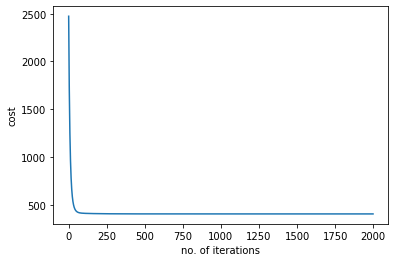

In [15]:
alpha = 0.037
epoch =2000

cost,b = gradient_descent(x_train,y_train,alpha,epoch)

h = hypothesis(x_test,b)

accuracy = CalculateAccuracy(h,y_test)
print('Parameters Found:\n',b)

print('accuracy in %: ',accuracy*100)
plotCost(cost)

In [13]:
#cost